# Project

# For a company developing mobile games

## Research on certain aspects of mobile application

Retention is one of the most important metrics for the company under review. As a part of this project it is required to create a fuction which will allow to determine retention of users (day-wise from the registration date).

### Part 1. Data loading, exploration and cleaning

We have 2 files with data. One contains data on time of registration of application's users. Another has the data on time of using the app by the users.

In [235]:
# import of necessary libraries
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [130]:
# reading the datasets

reg_data = pd.read_csv('/Users/danil/Documents/KC/Project 1/problem1-reg_data.csv', sep=';')
auth_data = pd.read_csv('/Users/danil/Documents/KC/Project 1/problem1-auth_data.csv', sep=';')

Will explore the datasets (types of data, null values, duplicates, dates)

In [131]:
# explore the dataset with registration information
reg_data.head()

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5


In [132]:
reg_data.shape

(1000000, 2)

In [133]:
# types of data
reg_data.dtypes

reg_ts    int64
uid       int64
dtype: object

In [134]:
# number of null cells
reg_data.isna().sum()

reg_ts    0
uid       0
dtype: int64

In [135]:
# number of duplicates in users
reg_data.uid.duplicated().sum()

0

In [136]:
# explore dataset with authorizations
auth_data.head()

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2


In [137]:
auth_data.shape

(9601013, 2)

In [138]:
# types of data
auth_data.dtypes

auth_ts    int64
uid        int64
dtype: object

In [139]:
# number of null cells
auth_data.isnull().sum()

auth_ts    0
uid        0
dtype: int64

In [140]:
# number of unique users
auth_data.uid.nunique()

1000000

In [141]:
# change type of data in the columns with time
reg_data['reg_ts'] = pd.to_datetime(reg_data['reg_ts'], unit='s').dt.round('d')
reg_data = reg_data.rename(columns={'reg_ts': 'reg_date'})
auth_data['auth_ts'] = pd.to_datetime(auth_data['auth_ts'], unit='s').dt.round('d')
auth_data = auth_data.rename(columns={'auth_ts': 'auth_date'})

In [142]:
reg_data.head()

,reg_date,uid
0,1998-11-18,1
1,1999-07-23,2
2,2000-01-14,3
3,2000-05-29,4
4,2000-09-16,5


In [143]:
# minimum date in registration data
reg_data['reg_date'].min()

Timestamp('1998-11-18 00:00:00')

In [144]:
# maximum date in registration data
reg_data['reg_date'].max()

Timestamp('2020-09-24 00:00:00')

In [145]:
auth_data.head()

,auth_date,uid
0,1998-11-18,1
1,1999-07-23,2
2,1999-07-26,2
3,1999-07-31,2
4,1999-08-06,2


In [146]:
# minimum date in authorization data
auth_data['auth_date'].min()

Timestamp('1998-11-18 00:00:00')

In [147]:
# maximum date in authorization data
auth_data['auth_date'].max()

Timestamp('2020-09-24 00:00:00')

### Part 2.  Users' retention  in the application

Function 'retention' will be called with 4 arguments: two datasets with informaiton on registration and authorization of users, and two dates in the format 'YYYY-MM-DD' (start and end date of required interval in which we want to explore retention). The function will return a table with columns representing days form the date of registration, indexes will be the date of registration, and values will represent the percentage of users who enters the application the given day

In [153]:
def retention(reg_data,
             auth_data,
             start_date,
             end_date):

    # interval in which it is required to determine retention
    start = datetime.date.fromisoformat(start_date)
    end = datetime.date.fromisoformat(end_date)

    # select data in the interval determined
    reg_data = reg_data.query('reg_date >= @start and reg_date <= @end')
    auth_data = auth_data.query('auth_date >= @start and auth_date <= @end')
    
    # create dataframe where for each authorization we will have date of registration 
    df = auth_data.merge(reg_data, on = 'uid')
    
    # create column with number of days since registration of a user
    df['days_after_registration'] = (df['auth_date'] - df['reg_date']).dt.days
    
    # create dataframe which will show the number of active users on each date of the selected interval    
    df_active = df.groupby(['reg_date', 'days_after_registration'])['uid'].nunique().reset_index()
    
    # create table representing number of users on a certain day after the date of registration
    cohorts = df_active.pivot(index='reg_date', columns='days_after_registration', values='uid')
    
    # create series with the number of users registered on each day of the selected interval
    base = cohorts[0]
    
    # create retention table which represents the percenrtage of users retained
    retention = cohorts.divide(base, axis=0).round(3).mul(100)
    
    return retention

In [240]:
# select the interval of dates and check the results

start_date = '2019-09-01'
end_date = '2019-10-01'

resulting_table = retention(reg_data, auth_data, start_date, end_date)

In [241]:
resulting_table

days_after_registration,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
reg_date,,,,,,,,,,,,,,,,,,,,,
2019-09-01,100.0,3.1,4.0,3.9,5.8,6.6,7.0,7.6,5.2,5.2,...,2.3,3.6,4.7,5.3,4.0,3.8,3.7,2.9,3.3,3.8
2019-09-02,100.0,2.5,3.0,3.5,5.2,5.5,6.0,4.7,6.3,4.9,...,4.4,3.3,3.6,3.0,4.1,4.7,2.8,2.8,3.2,NaN
2019-09-03,100.0,1.8,4.0,4.2,6.3,6.2,7.8,6.3,4.8,6.7,...,4.7,3.3,3.9,3.0,3.2,4.0,3.7,4.1,NaN,NaN
2019-09-04,100.0,2.3,3.4,3.9,4.5,4.7,6.8,5.3,4.1,4.6,...,3.7,4.2,2.6,2.9,2.4,3.4,3.1,NaN,NaN,NaN
2019-09-05,100.0,0.9,4.1,5.3,5.6,6.6,7.0,5.1,5.3,4.7,...,4.0,3.5,3.5,3.2,3.1,3.8,NaN,NaN,NaN,NaN
2019-09-06,100.0,1.8,4.0,4.1,4.5,5.4,6.6,6.9,4.8,4.1,...,4.3,2.5,3.2,3.8,2.9,NaN,NaN,NaN,NaN,NaN
2019-09-07,100.0,2.7,4.0,5.8,5.8,4.5,8.3,6.5,4.2,5.5,...,3.8,3.3,3.9,4.9,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-08,100.0,2.3,3.1,4.6,4.9,5.4,6.9,5.6,4.6,4.6,...,3.8,3.5,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-09,100.0,1.6,4.9,4.5,5.3,7.2,7.6,6.2,4.0,6.2,...,3.8,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
# create the function to visualize the results using heatmap

def retention_visual(table):
    plt.figure(figsize=(26, 20))
    sns.set(font_scale=1.5)
    plt.title('Retention, %')
    ax = sns.heatmap(data=table, annot=True,
                fmt='.3g', cmap='rocket_r')
    ax.set_yticklabels(table.reset_index().reg_date.astype(str).str[:10])
    plt.show()

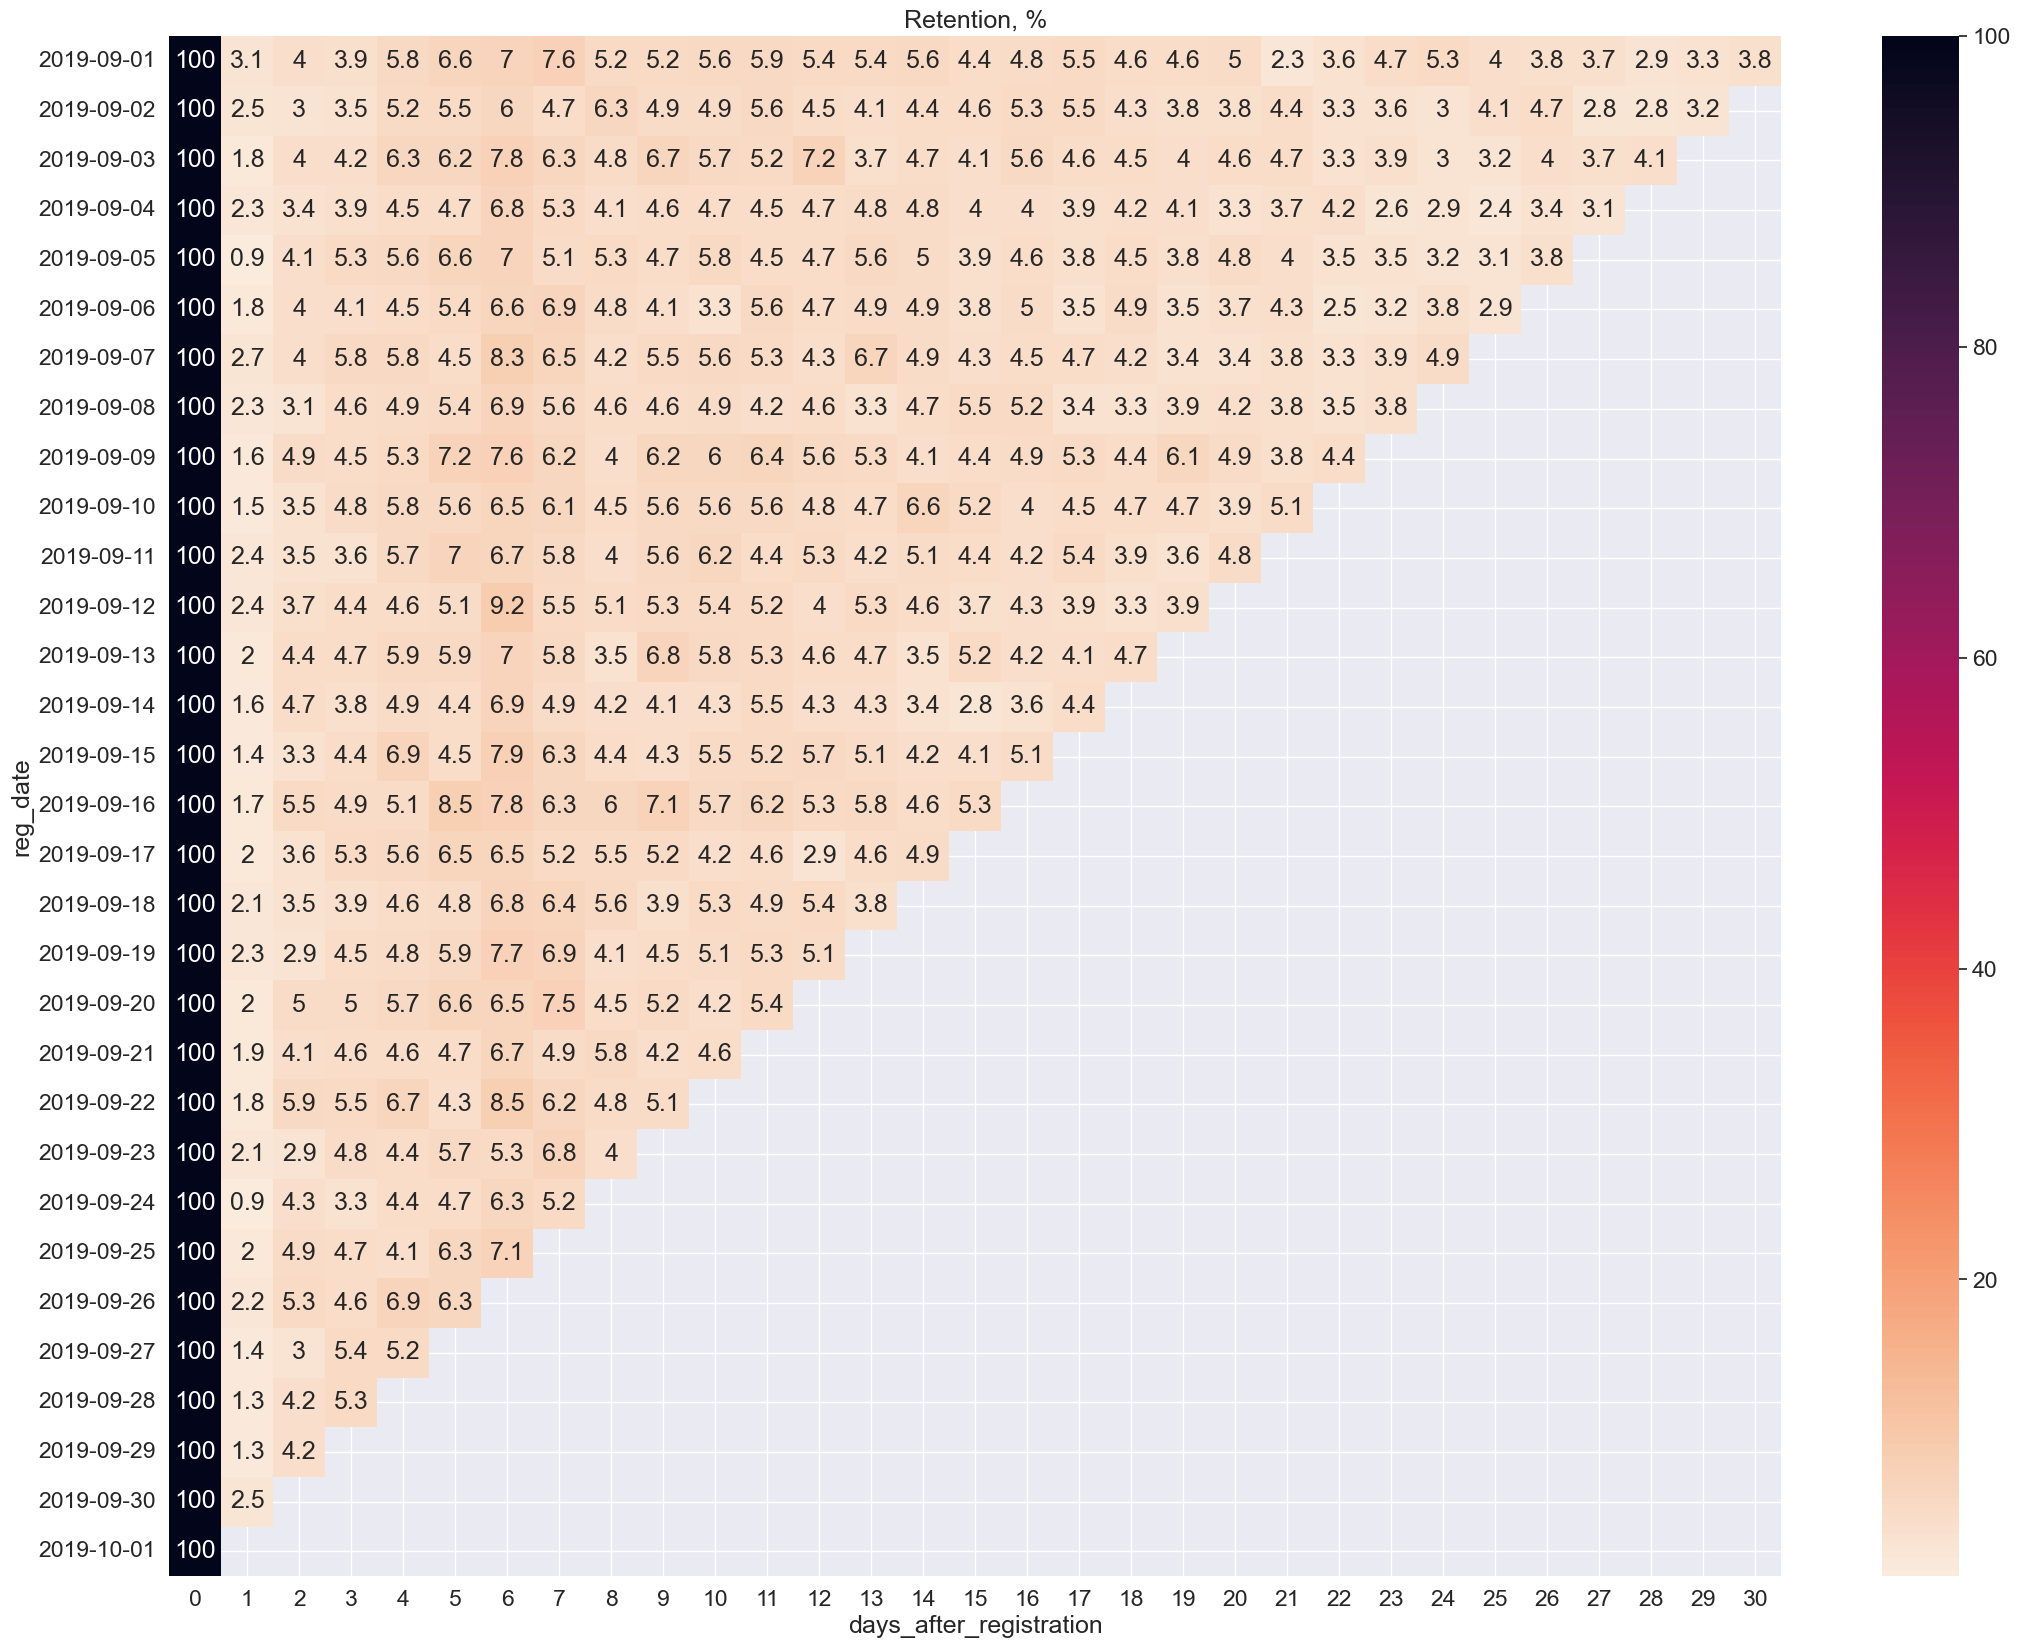

In [243]:
retention_visual(resulting_table)

## Conclusion

Based on the results of segmentation and provided we have further details on activities of the app, we can discuss further possibilities for improvement. We can determine the days when the retention drastically fell and see what happened on those days. Or vice versa, when the retention grows we can determine the happenings of those days (new actions, featuers introduced etc.)